### Creating an new directory to store smaller dataset

In [4]:
import os, shutil

original_dataset_dir = 'C:/Users/Supriya/Documents/Coursera/dogs-vs-cats/train'
base_dir = '/Users/Supriya/Documents/Coursera/cats_and_dogs_small1'
os.mkdir(base_dir)


### Creating directories for train , validation and test for cats and dogs

In [5]:
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)


validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
os.mkdir(validation_dogs_dir)


train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)


test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


#### Copies the first 1,000 cat images to train_cats_dir
#### Copies the next 500 cat images to validation_cats_dir
#### Copies the next 500 cat images to test_cats_dir
#### Copies the first 1,000 dog images to train_dogs_dir
#### Copies the next 500 dog images to validation_dogs_dir
#### Copies the next 500 dog images to test_dogs_dir

In [6]:


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
     
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


### Sanity check 

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [8]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [9]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

total validation cat images: 500
total test cat images: 500


In [10]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total validation dog images: 500
total test dog images: 500


### Instantiating a small convnet for dogs vs cats classification

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### Dimensions of feature maps summary

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Configuring the model for training

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
                train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Fitting the model using batch generator

In [18]:
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=30, validation_data = validation_generator, validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 55s 550ms/step - loss: 0.6860 - acc: 0.5350 - val_loss: 0.6674 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 52s 524ms/step - loss: 0.6555 - acc: 0.6165 - val_loss: 0.6555 - val_acc: 0.6010
Epoch 3/30
100/100 [==============================] - 52s 525ms/step - loss: 0.6035 - acc: 0.6785 - val_loss: 0.6480 - val_acc: 0.6140
Epoch 4/30
100/100 [==============================] - 52s 525ms/step - loss: 0.5609 - acc: 0.7145 - val_loss: 0.5905 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 53s 526ms/step - loss: 0.5294 - acc: 0.7365 - val_loss: 0.5966 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 52s 523ms/step - loss: 0.5112 - acc: 0.7325 - val_loss: 0.5670 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 53s 525ms/step - loss: 0.4797 - acc: 0.7745 - val_loss: 0.5470 - val_acc: 0.7150
Epoch 8

### Saving the model

In [19]:
model.save('cats_and_dogs_small_1.h5')

### Displaying curves of loss and accuracy during training

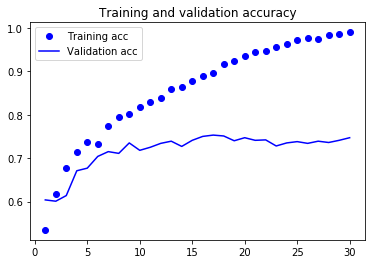

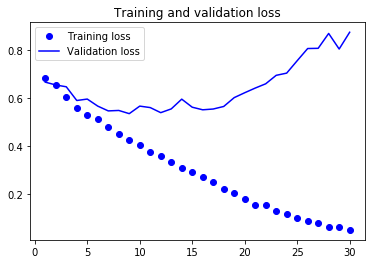

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Data Augmentation

In [22]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Displaying Randomly augmented training images

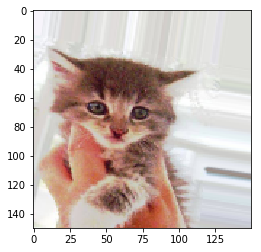

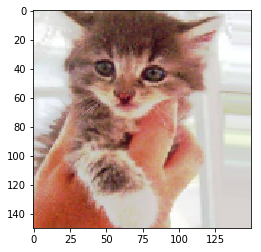

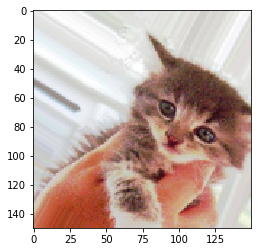

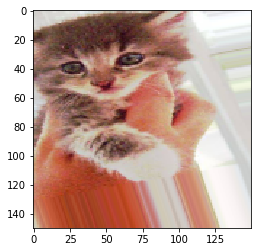

In [24]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3] 

img = image.load_img(img_path, target_size=(150, 150)) 

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0  
for batch in datagen.flow(x, batch_size=1):  
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i % 4 == 0:
        break
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=2, class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 111s 1s/step - loss: 0.6904 - acc: 0.5259 - val_loss: 0.6399 - val_acc: 0.6000
Epoch 2/100
100/100 [==============================] - 105s 1s/step - loss: 0.6746 - acc: 0.5681 - val_loss: 0.6901 - val_acc: 0.5100
Epoch 3/100
100/100 [==============================] - 107s 1s/step - loss: 0.6628 - acc: 0.5815 - val_loss: 0.6126 - val_acc: 0.6200
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 0.6347 - acc: 0.6350 - val_loss: 0.5966 - val_acc: 0.6900
Epoch 5/100
100/100 [==============================] - 106s 1s/step - loss: 0.6182 - acc: 0.6603 - val_loss: 0.5853 - val_acc: 0.6600
Epoch 6/100
100/100 [==============================] - 105s 1s/step - loss: 0.6119 - acc: 0.6631 - val_loss: 0.5910 - val_acc: 0.6700
Epoch 7/100
100/100 [==============================] - 106s 1s/step - loss: 0.6012 - acc: 0.6703 - val_loss: 0.6

### Saving the model

In [28]:
model.save('cats_and_dogs_small_2.h5')

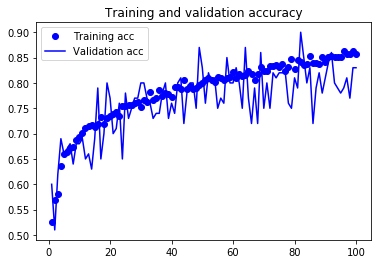

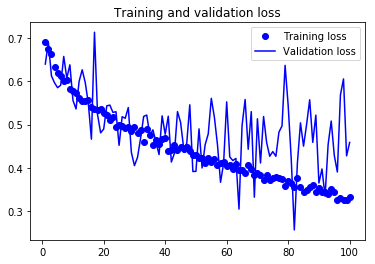

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Pretrained Network

In [30]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [31]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [32]:
import numpy as np

### Adding densely connected classifier on top of the convolution base

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


#### Freezing

In [39]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [40]:
conv_base.trainable = False

In [42]:
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [43]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [44]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(
        train_dir,                                               
        target_size=(150, 150),                                  
        batch_size=20,
        class_mode='binary')                                     


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 630s 21s/step - loss: 0.6495 - acc: 0.6183 - val_loss: 0.5754 - val_acc: 0.7030
Epoch 2/30
30/30 [==============================] - 515s 17s/step - loss: 0.5869 - acc: 0.6950 - val_loss: 0.5132 - val_acc: 0.7710
Epoch 3/30
30/30 [==============================] - 26404s 880s/step - loss: 0.5520 - acc: 0.7350 - val_loss: 0.4797 - val_acc: 0.7810
Epoch 4/30
30/30 [==============================] - 537s 18s/step - loss: 0.5193 - acc: 0.7800 - val_loss: 0.4274 - val_acc: 0.8360
Epoch 5/30
30/30 [==============================] - 536s 18s/step - loss: 0.4889 - acc: 0.7600 - val_loss: 0.3939 - val_acc: 0.8500
Epoch 6/30
30/30 [==============================] - 531s 18s/step - loss: 0.4701 - acc: 0.7700 - val_loss: 0.3816 - val_acc: 0.8380
Epoch 7/30
30/30 [==============================] - 530s 18s/step - loss: 0.4387 - acc: 0.8117 - val_loss: 0.3785 - val_a

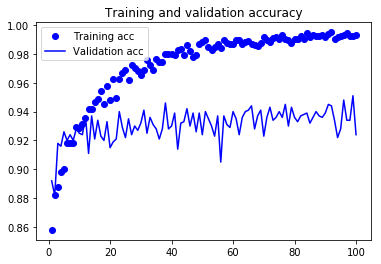

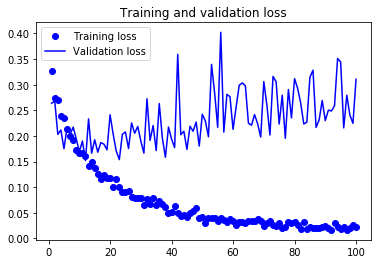

In [53]:
import matplotlib.pyplot as plt

%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine tuning

In [54]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 499s 5s/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.4134 - val_acc: 0.9190
Epoch 2/50
100/100 [==============================] - 604s 6s/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.2435 - val_acc: 0.9430
Epoch 3/50
100/100 [==============================] - 1099s 11s/step - loss: 0.0210 - acc: 0.9925 - val_loss: 0.2903 - val_acc: 0.9390
Epoch 4/50
100/100 [==============================] - 1072s 11s/step - loss: 0.0161 - acc: 0.9935 - val_loss: 0.2385 - val_acc: 0.9450
Epoch 5/50
100/100 [==============================] - 1100s 11s/step - loss: 0.0187 - acc: 0.9925 - val_loss: 0.2255 - val_acc: 0.9410
Epoch 6/50
100/100 [==============================] - 1102s 11s/step - loss: 0.0206 - acc: 0.9925 - val_loss: 0.2718 - val_acc: 0.9450
Epoch 7/50
100/100 [==============================] - 1104s 11s/step - loss: 0.0153 - acc: 0.9930 - val_loss: 0.2682 - val_acc: 0.9390
Epoch 8/50
100/100 [==============================] - 1104s

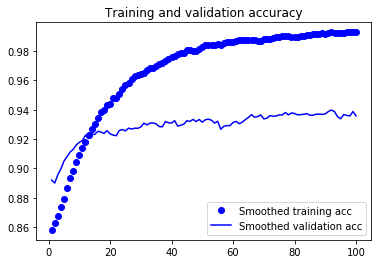

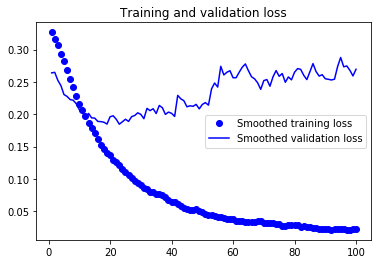

In [56]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.935999995470047


In [83]:
result = model.predict_generator(test_generator, steps = 50)

In [84]:
result

array([[9.99186993e-01],
       [3.92787188e-01],
       [2.82491386e-01],
       [4.10849333e-01],
       [5.10024130e-02],
       [9.30983424e-02],
       [9.77985799e-01],
       [7.79766858e-01],
       [9.94560242e-01],
       [2.74542809e-01],
       [1.30939454e-01],
       [3.34437490e-02],
       [3.76400948e-02],
       [2.79556215e-02],
       [4.89364564e-02],
       [9.66637135e-01],
       [3.42375100e-01],
       [2.12984204e-01],
       [9.76760387e-02],
       [8.35770488e-01],
       [5.51619172e-01],
       [6.12285018e-01],
       [9.70908225e-01],
       [9.66836214e-02],
       [4.93747860e-01],
       [7.43098080e-01],
       [7.08476901e-02],
       [9.99556780e-01],
       [9.99733567e-01],
       [9.42770183e-01],
       [2.65517831e-03],
       [2.93647945e-02],
       [9.83434319e-01],
       [9.21623409e-02],
       [7.14432418e-01],
       [9.99704957e-01],
       [1.54551297e-01],
       [1.29463762e-01],
       [9.67031360e-01],
       [9.95386124e-01],


In [85]:
results_df = [1 if  value>0.5 else 0 for value in result ]

In [87]:
import pandas as pd

submission = pd.DataFrame({"label": results_df})

In [88]:
submission

,label
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,0


In [89]:
submission.to_csv('submission.csv', index=False)

## Visualizations

### Saving the model

In [58]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

### Preprocessing a single image

In [61]:
img_path = 'C:/Users/Supriya/Documents/Coursera/dogs-vs-cats/test1/1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

print(img_tensor.shape)

(1, 150, 150, 3)


### Displaying the picture

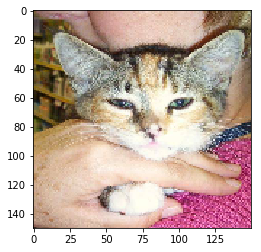

In [62]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [63]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Running the model in predict mode

In [64]:
activations = activation_model.predict(img_tensor)

#### First activation of the first convolution layer for the cat image input

In [65]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


### Plotting the fourth channel of the activation of the first layer of the original model 

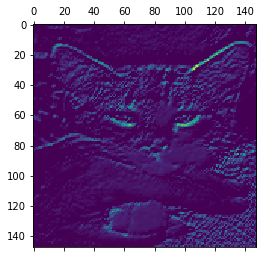

In [66]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### Plotting the 7th channel of the activation of the first layer of the original model 

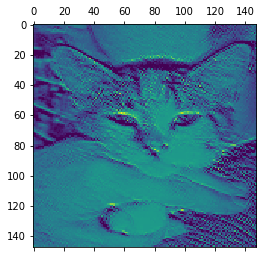

In [67]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

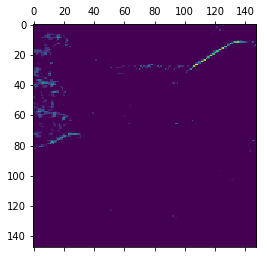

In [79]:
plt.matshow(first_layer_activation[0, :, :,8], cmap='viridis')

### Visualizing every channel in every intermediate activation

C:\Users\Supriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


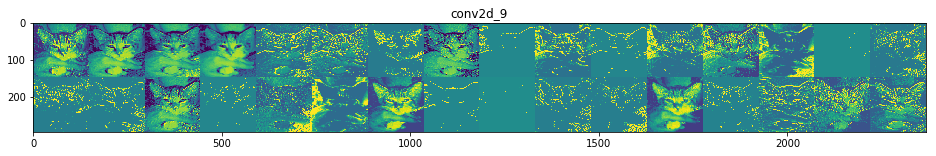

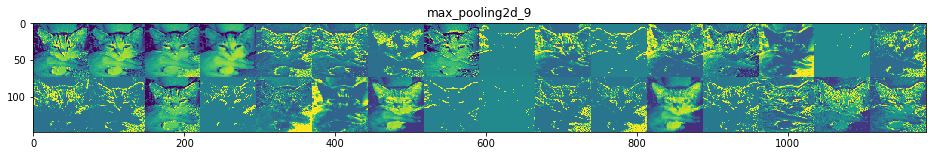

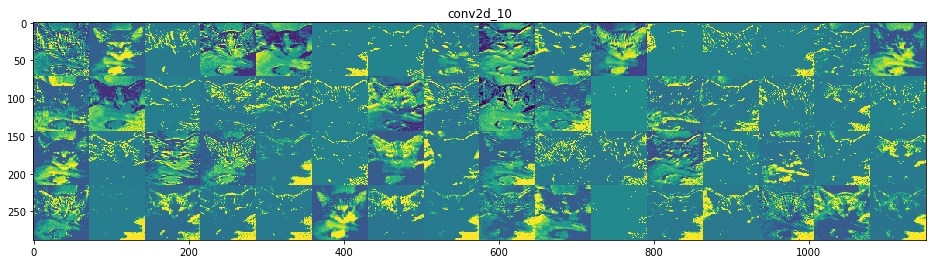

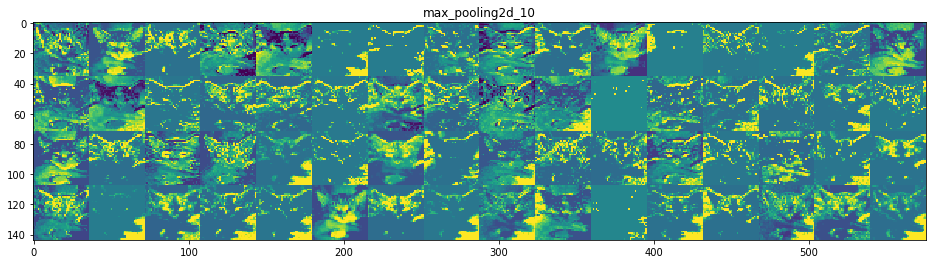

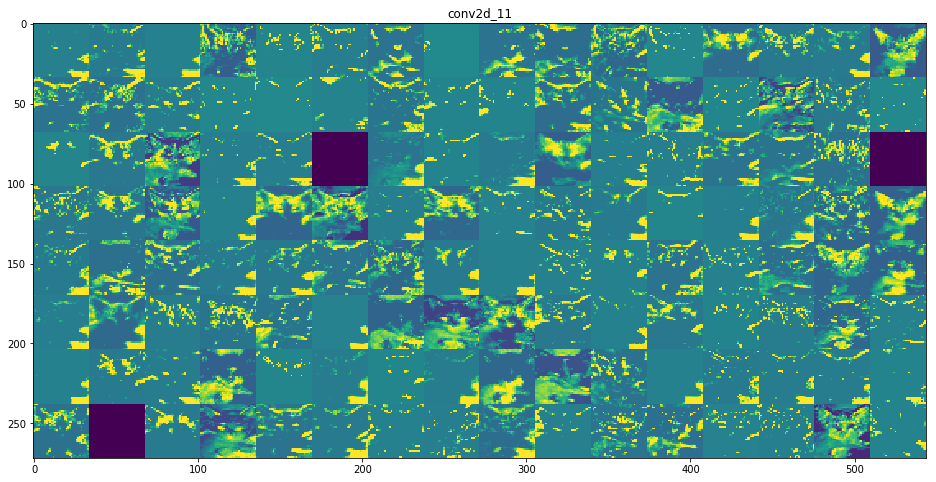

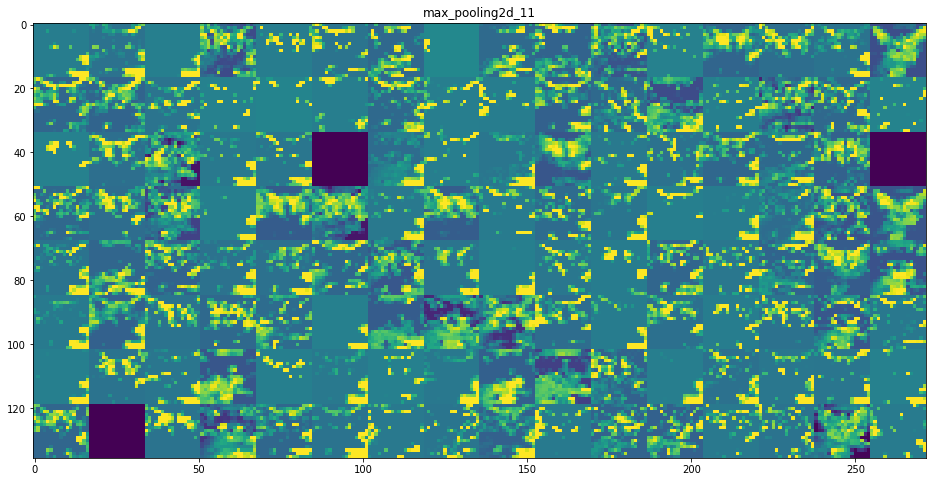

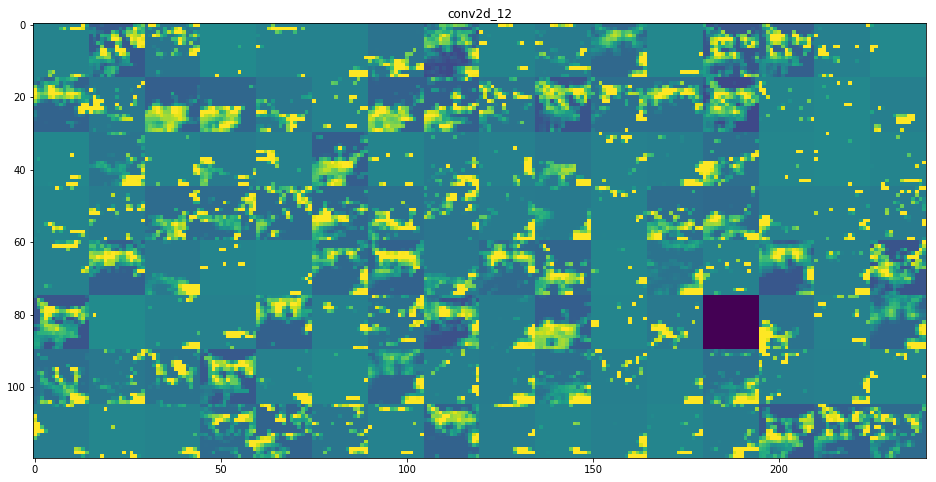

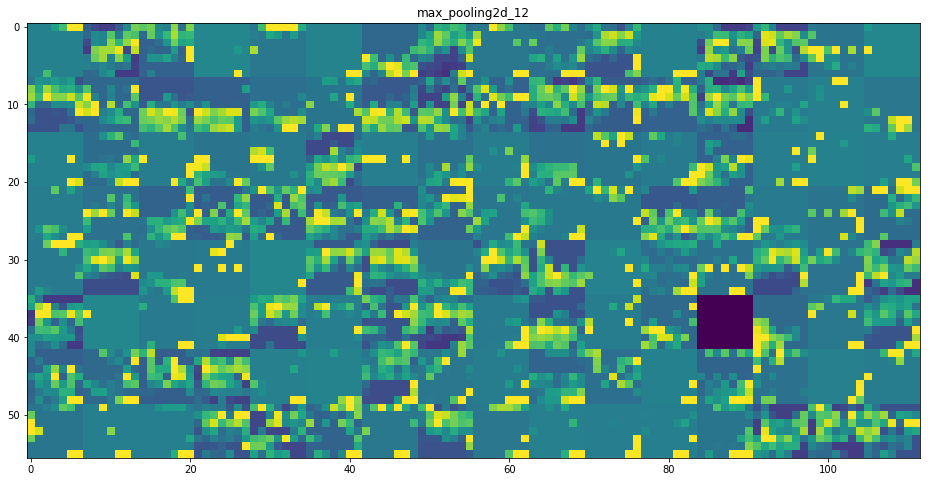

In [82]:
layer_names = []                                                          
for layer in model.layers[:8]:                                            
    layer_names.append(layer.name)                                        

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):        
    n_features = layer_activation.shape[-1]                               

    size = layer_activation.shape[1]                                      

    n_cols = n_features // images_per_row                                 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):                                             
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                         
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                   
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')